In [59]:
import pandas as pd
import numpy as np
from sklearn import (linear_model,
                     tree,
                     ensemble,
                     metrics,
                     model_selection,
                     preprocessing,
                     datasets)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [60]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
data = datasets.load_diabetes(as_frame=True)
X = data['frame'].drop('target', axis=1)
y = data['target']
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


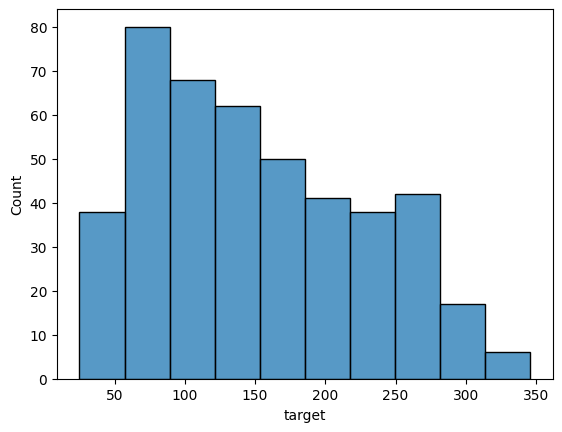

In [62]:
sns.histplot(y);

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.33, random_state=42)

print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


In [64]:
regr1 = tree.DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)
regr1.fit(X_train, y_train)

regr2 = ensemble.RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    random_state=42
)
regr2.fit(X_train, y_train)

y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

print('MSE test tree: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred1)))
print('MSE test ensemble: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred2)))

MSE test tree: 6132.51
MSE test ensemble: 3533.73


In [65]:
estimator = [
    ('lr', linear_model.RidgeCV()),
    ('dt', tree.DecisionTreeRegressor(random_state=42))
    ]

In [66]:
st = ensemble.StackingRegressor(
    estimators=estimator,
    final_estimator=ensemble.RandomForestRegressor(
        n_estimators=10,
        random_state=42
    )
)
st.fit(X_train, y_train)

y_pred = st.predict(X_test)

print('MSE test tree: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))

MSE test tree: 3467.74


In [67]:
dt = tree.DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

ab = ensemble.AdaBoostRegressor(
    estimator=dt,
    n_estimators=10,
    random_state=42
)
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

print('MSE test tree: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))

MSE test tree: 3040.83


In [71]:
gb = ensemble.GradientBoostingRegressor(
    # max_depth=3,
    n_estimators=50,
    random_state=42
)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train) 

print('MSE test tree: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('MSE train tree: {:.2f}'.format(metrics.mean_squared_error(y_train, y_pred_train)))

MSE test tree: 3100.08
MSE train tree: 1318.99
